## MNIST Fashion

### Load and prepare dataset

In [388]:
# import the desired packages
from keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [352]:
# load dataset
(X_train1, y_train1), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_train1, y_train1, train_size=0.75, random_state=42)

In [353]:
print("Training set is", X_train.shape[0]*100/X_train1.shape[0],"% of the original training data set")  # percentage of training set
print("Validation set is",X_validation.shape[0]*100/X_train1.shape[0],"% of the total data set") # percentage of validation set

Training set is 75.0 % of the original training data set
Validation set is 25.0 % of the total data set


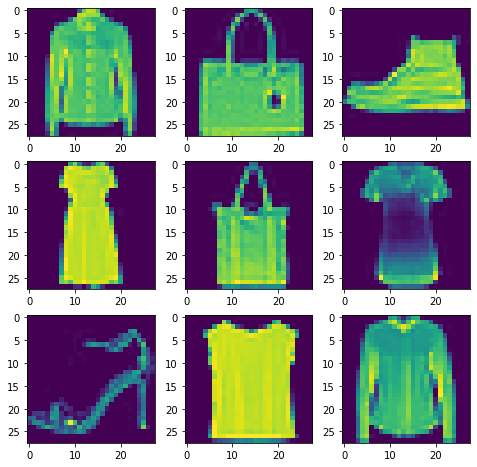

In [360]:
# plot first few images
plt.figure(figsize=(8,8))
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# plot raw pixel data
    plt.imshow(X_train[i])
# show the figure
plt.show()

#### Scale pixels

In [361]:
# scale pixels
def prep_pixels(X_train, X_validation, X_test):
    # convert from integers to floats
    train_norm = X_train.astype('float32')
    validation_norm = X_validation.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    validation_norm = validation_norm/ 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, validation_norm, test_norm

X_train_prep, X_validation_prep, X_test_prep = prep_pixels(X_train, X_validation, X_test)

In [362]:
# Check preprocessing 
X_train_prep[2][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00784314, 0.        , 0.        ,
       0.6       , 0.22352941, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.2784314 ,
       0.09411765, 0.        , 0.00392157], dtype=float32)

#### Flatten data

In [366]:
# Flatten
X_train_final = [i.flatten('C') for i in X_train_prep]
X_validation_final = [i.flatten('C') for i in X_validation_prep]
X_test_final = [i.flatten('C') for i in X_test_prep]
len(X_train_final)

45000

**(a) Implement random forest for the dataset and report your model’s accuracy on the test set. You need to mildly tune the hyper-parameters such as number of estimators and max depth (with the validation data) for the random forest model.**

In [201]:
# we will use the DecisionTreeClassifier function available in the sklearn package
score_list = [] # initialise an empty list that will iteratively be appended the % accuracy
depth_range = [i for i in range(1,16)] # list containing values of max_depth from 1 to 100
estimators_range = [i for i in range(1,16)]
for depth in depth_range: # for loop going through all the values of max depth at a time
    for estimator in estimators_range:
        RFC = RandomForestClassifier(max_depth = depth, n_estimators = estimator) # initialise a DecisionTreeClassifier for the value of max_depth
        RFC.fit(X_train_final, y_train) # fit the model with the training data 
        y_pred = RFC.predict(X_validation_final) # predict the validation set using the trained model
        # find the number of correctly predicted data and divide by the total number of rows and append to score_list 
        score_list.append([metrics.accuracy_score(y_validation, y_pred)*100, depth, estimator])

The best classifier is for max depth = 15 and n_estimators = 15 with accuracy 86.507 %


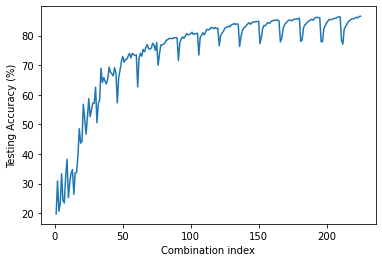

In [213]:
accuracy = [i[0] for i in score_list]
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between max_depth and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1,226), accuracy)
plt.xlabel('Combination index')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for max depth =', score_list[accuracy.index(max(accuracy))][1], 'and n_estimators =',
      score_list[accuracy.index(max(accuracy))][2], 'with accuracy', round(max(accuracy), 3), '%')

In [215]:
# create new decision tree classifier with the max_depth that gives the best accuracy on the training set
RFC = RandomForestClassifier(max_depth = score_list[accuracy.index(max(accuracy))][1], 
                             n_estimators = score_list[accuracy.index(max(accuracy))][2])
RFC.fit(X_train_final, y_train) # fit training data
prediction_train = RFC.predict(X_test_final) # predict training data
print("The accuracy of the tree is", round(metrics.accuracy_score(y_test, prediction_train)*100,3),'%')

The accuracy of the tree is 85.6 %


**(b) Implement a fully-connected neural network with the same setup as the code provided in class. You might need to adapt the model architecture therein to fit in this task, such as the input and output dimensions. For intermediate layers, you can simply use 12 and 8 neurons. Report the test accuracy of your trained neural network model. For this part, since we don’t tune the hyper-parameter, you can combine the training and validation set for the training of the neural network.**

In [390]:
(X_train1, y_train1), (X_test, y_test) = fashion_mnist.load_data() 
encoder = LabelEncoder()
encoder.fit(y_train1)
encoded_y = encoder.transform(y_train1)
dummy_y_train = np_utils.to_categorical(encoded_y)
dummy_y_test = np_utils.to_categorical(encoder.transform(y_test))

def prep_pixels(X_train, X_test):
    # convert from integers to floats
    train_norm = X_train.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

X_train1_prep, X_test_prep = prep_pixels(X_train1, X_test)

X_train1_final = np.asarray([i.flatten('C') for i in X_train1_prep])
X_test_final = np.asarray([i.flatten('C') for i in X_test_prep])

model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train1_final, dummy_y, epochs=30, batch_size=10, verbose =0)

In [391]:
_, accuracy = model.evaluate(X_test_final, dummy_y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 656us/step - loss: 0.0734 - accuracy: 0.8518
Accuracy: 85.18


**(c) Now, let’s explore a bit in terms of the hyper-parameter tuning of the neural network models. Please try out the following options and briefly report what you observe:**

In [398]:
(X_train1, y_train1), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_validation, y_train, y_validation = train_test_split(X_train1, y_train1, train_size=0.75, random_state=42)

encoder = LabelEncoder()
encoder.fit(y_train)
dummy_y_train = np_utils.to_categorical(encoder.transform(y_train))
dummy_y_test = np_utils.to_categorical(encoder.transform(y_test))
dummy_y_validation = np_utils.to_categorical(encoder.transform(y_validation))

def prep_pixels(X_train, X_validation, X_test):
    # convert from integers to floats
    train_norm = X_train.astype('float32')
    validation_norm = X_validation.astype('float32')
    test_norm = X_test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    validation_norm = validation_norm/ 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, validation_norm, test_norm

X_train_prep, X_validation_prep, X_test_prep = prep_pixels(X_train, X_validation, X_test)

X_train_final = np.asarray([i.flatten('C') for i in X_train_prep])
X_validation_final = np.asarray([i.flatten('C') for i in X_validation_prep])
X_test_final = np.asarray([i.flatten('C') for i in X_test_prep])

**- Add one more layer between the 12-neuron layer and the input layer; decide the numbers of neurons on that layer on your own.**

In [400]:
acc_list = []
neurons_range = [12,20,50,100]
for neurons in neurons_range: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 638us/step - loss: 0.0713 - accuracy: 0.8665


The best classifier is for neurons = 100 with accuracy 86.653 %


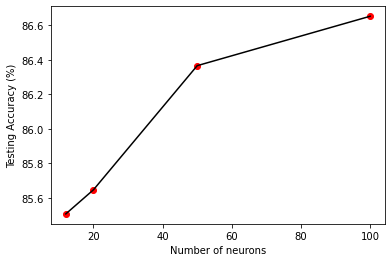

In [404]:
plt.scatter(neurons_range, acc_list, color = 'r')
plt.plot(neurons_range, acc_list, color = 'black')
plt.xlabel('Number of neurons')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for neurons =', neurons_range[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

In [403]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(neurons_range[acc_list.index(max(acc_list))], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, dummy_y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 644us/step - loss: 0.0749 - accuracy: 0.8556
Accuracy: 85.56


**- Change the numbers of the neurons (12 and 8) to other values.**

In [407]:
acc_list = []
neurons_range1 = [20,50,100]
neurons_range2 = [50,20,100]
combinations = ['20/50','50/20','100/100']
for neurons1, neurons2 in zip(neurons_range1,neurons_range2): # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(neurons1, input_dim = 784,activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 765us/step - loss: 0.0755 - accuracy: 0.8897


The best classifier is for neuron1 = 100  and for neuron2 = 100 with accuracy 88.967 %


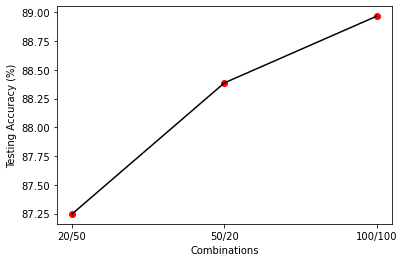

In [411]:
plt.scatter(combinations, acc_list, color = 'r')
plt.plot(combinations, acc_list, color = 'black')
plt.xlabel('Combinations')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for neuron1 =', neurons_range1[acc_list.index(max(acc_list))],
      ' and for neuron2 =', neurons_range2[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

In [414]:
model = Sequential()
model.add(Dense(neurons_range1[acc_list.index(max(acc_list))], input_dim = 784,activation='relu'))
model.add(Dense(neurons_range2[acc_list.index(max(acc_list))], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 800us/step - loss: 0.3251 - accuracy: 0.9000
Accuracy: 90.00


**- Change the loss function (through the loss in the compile function).**

In [416]:
acc_list = []
loss_types = ['categorical_crossentropy','poisson','kl_divergence']
for loss in loss_types: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 632us/step - loss: -1.4506e-05 - accuracy: 0.0993


The best classifier is for loss function = categorical_crossentropy with accuracy 85.973 %


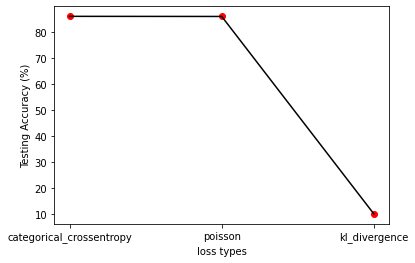

In [419]:
plt.scatter(loss_types, acc_list, color = 'r')
plt.plot(loss_types, acc_list, color = 'black')
plt.xlabel('loss types')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for loss function =', loss_types[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

In [418]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss=loss_types[acc_list.index(max(acc_list))], optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, np.asarray(dummy_y_train), epochs=30, batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 622us/step - loss: 0.4776 - accuracy: 0.8425
Accuracy: 84.25


**- Change the epochs and batch size in the fit function.**

#### Batch size

In [420]:
batch_range = [25, 32, 64]
acc_list = []
for batch in batch_range: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=batch, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 649us/step - loss: 0.0773 - accuracy: 0.8497


The best classifier is for batch size = 25 with accuracy 85.213 %


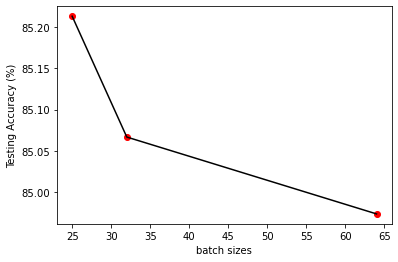

In [421]:
plt.plot(batch_range, acc_list, color = 'black')
plt.scatter(batch_range, acc_list, color = 'red')
plt.xlabel('batch sizes')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for batch size =', batch_range[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

In [422]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, dummy_y_train, epochs=30, batch_size=batch_range[acc_list.index(max(acc_list))], verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 643us/step - loss: 0.0793 - accuracy: 0.8479
Accuracy: 84.79


#### Epochs

In [423]:
epochs_range = [10, 50, 100]
acc_list = []
for epochs in epochs_range: # for loop going through all the values of max depth at a time
    model = Sequential()
    model.add(Dense(12, input_dim = 784,activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Flatten())
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train_final, dummy_y_train, epochs=epochs, batch_size=10, verbose = 0)
    _, accuracy = model.evaluate(X_validation_final, np.asarray(dummy_y_validation))
    acc_list.append(accuracy*100)

469/469 [==============================] - 0s 727us/step - loss: 0.0864 - accuracy: 0.8451


The best classifier is for epochs = 50 with accuracy 85.767 %


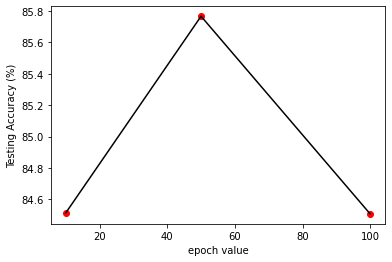

In [429]:
plt.plot(epochs_range, acc_list, color = 'black')
plt.scatter(epochs_range, acc_list, color = 'r')
plt.xlabel('epoch value')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for epochs =', epochs_range[acc_list.index(max(acc_list))],
      'with accuracy', round(max(acc_list), 3), '%')

In [425]:
model = Sequential()
model.add(Dense(12, input_dim = 784,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Flatten())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, dummy_y_train, epochs=epochs_range[acc_list.index(max(acc_list))], batch_size=10, verbose = 0)
_, accuracy = model.evaluate(X_test_final, np.asarray(dummy_y_test))
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 0s 667us/step - loss: 0.0835 - accuracy: 0.8418
Accuracy: 84.18
